/tmp/ipykernel_1664/1020975705.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_transposed.index = pd.to_datetime(df_transposed.index)  # Convert index to datetime format


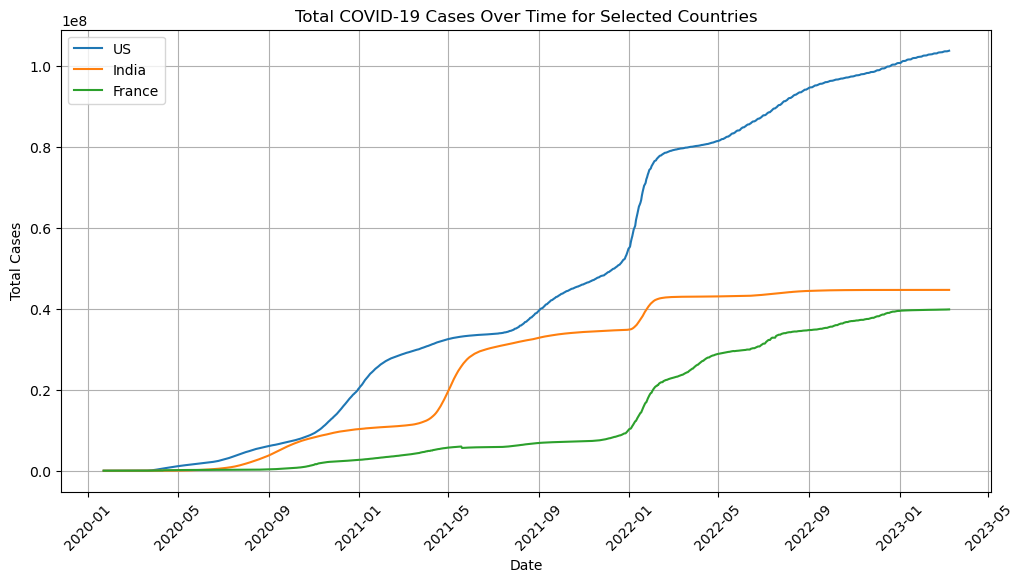

In [15]:
## Exploratory Data Analysis (EDA) - Total COVID-19 Confirmed Cases Over Time for Selected Countries.

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Filter for selected countries
selected_countries = ["US", "India", "France"]
df_filtered = df[df["Country/Region"].isin(selected_countries)]

# Drop non-date columns (assumes first columns are non-time series)
df_filtered = df_filtered.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")

# Aggregate cases by country
df_grouped = df_filtered.groupby("Country/Region").sum()

# Transpose the dataframe to make dates the x-axis
df_transposed = df_grouped.T
df_transposed.index = pd.to_datetime(df_transposed.index)  # Convert index to datetime format

# Plot the data
plt.figure(figsize=(12, 6))
for country in selected_countries:
    plt.plot(df_transposed.index, df_transposed[country], label=country)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Total COVID-19 Cases Over Time for Selected Countries")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()


# COVID-19 Cases  Report 📊
##*Key Finding:ngs:

The top three countries with the highest confirmed COVID-19 cases U:

- **United Stes SA)**- *Franceormatting further?es



/tmp/ipykernel_1664/2385940017.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_deaths_transposed.index = pd.to_datetime(df_deaths_transposed.index, errors='coerce')
/tmp/ipykernel_1664/2385940017.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cases_transposed.index = pd.to_datetime(df_cases_transposed.index, errors='coerce')


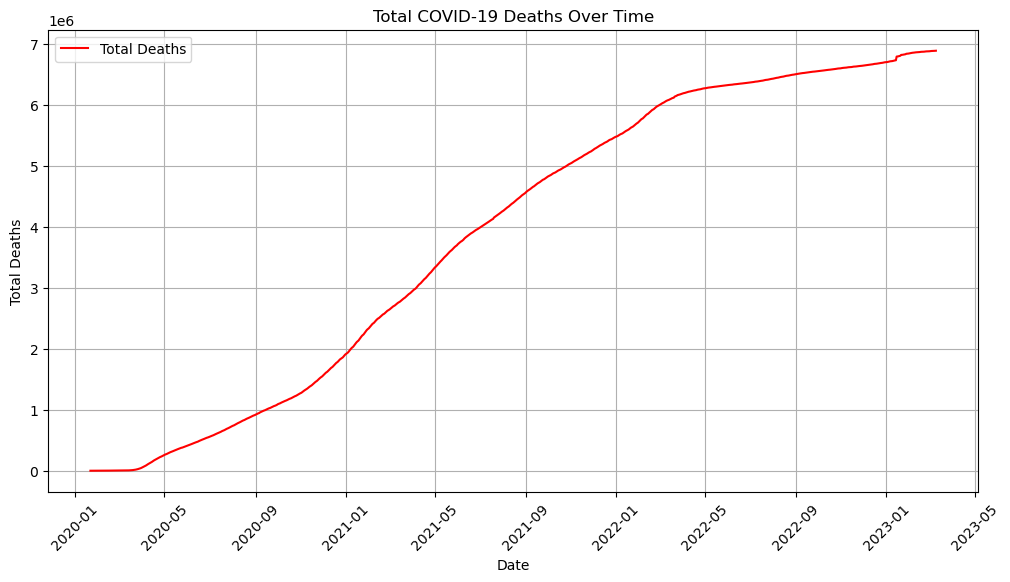

In [6]:
## Exploratory Data Analysis (EDA) - Total COVID-19 Death Cases Over Time for Selected Countries.
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
df_cases = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Remove non-date columns before grouping
df_deaths_filtered = df_deaths.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")
df_cases_filtered = df_cases.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")

# Aggregate total cases and deaths by country
df_deaths_grouped = df_deaths_filtered.groupby("Country/Region").sum()
df_cases_grouped = df_cases_filtered.groupby("Country/Region").sum()

# Transpose the DataFrames to make dates the x-axis
df_deaths_transposed = df_deaths_grouped.T
df_cases_transposed = df_cases_grouped.T

# Convert the index to datetime format
df_deaths_transposed.index = pd.to_datetime(df_deaths_transposed.index, errors='coerce')
df_cases_transposed.index = pd.to_datetime(df_cases_transposed.index, errors='coerce')

# Plot total deaths over time
plt.figure(figsize=(12, 6))
plt.plot(df_deaths_transposed.index, df_deaths_transposed.sum(axis=1), label="Total Deaths", color="red")

plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Total COVID-19 Deaths Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


# COVID-19 Deaths Report 📊
## Key Findings: 
- An analysis of the data indicates a notable increase in the number of deaths from the first year of the COVID-19 pandemic to its third year, reflecting the evolving impact of the virus over time.

In [16]:
## Calculate the death rate: total_deaths / total_cases

import pandas as pd

# Load datasets (update filenames as needed)
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
df_cases = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Remove unnecessary columns before aggregating
df_deaths_filtered = df_deaths.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")
df_cases_filtered = df_cases.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")

# Aggregate total cases and deaths by country
df_deaths_grouped = df_deaths_filtered.groupby("Country/Region").sum()
df_cases_grouped = df_cases_filtered.groupby("Country/Region").sum()

# Select specific countries
selected_countries = ["US", "India", "France"]
df_deaths_selected = df_deaths_grouped.loc[selected_countries]
df_cases_selected = df_cases_grouped.loc[selected_countries]

# Calculate total death rate per country
total_death_rate = df_deaths_selected.sum(axis=1) / df_cases_selected.sum(axis=1)

# Display results
print(total_death_rate)


Country/Region
US        0.013266
India     0.012527
France    0.007042
dtype: float64




### COVID-19 Case Fatality Rates (CFR) in Selected Countries

| Country | Death Rate (Deaths / Confirmed Cases) |
|---------|----------------------------------------|
| US      | 1.33% (0.013266)                       |
| India   | 1.25% (0.012527)                       |
| France  | 0.70% (0.007042)                ##      |

*iscussio**

- The *nitedtates and **India** have similar case fatality rates around 1.25–1.33%, suggesting comparable proportions of reported cases resulting in death. These figures may be influenced by factors like testing capacity, healthcare infrastructure, population demographics, and reportingccuracy.
- **France's** lower CFR of approximately 0.70% could be due to more extensive testing capturing mild or asymptomatic cases, differences in healthcare quality, or reporting practices.

- It's important to note that CFRs are affected by testing rates (more testing can lower the apparent CFR by identifying more mild cases), healthcare system capacity, and population a## Stributi

**In summary:**  
While the death rates are relatively close between the US and India, France's lower rate may reflect differences in testing and healthcare management. These numbers should be interpreted cautiously, considering potential underreporting andnsights or comparisons?

/tmp/ipykernel_1664/222575317.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_deaths_transposed.index = pd.to_datetime(df_deaths_transposed.index, errors='coerce')
/tmp/ipykernel_1664/222575317.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cases_transposed.index = pd.to_datetime(df_cases_transposed.index, errors='coerce')


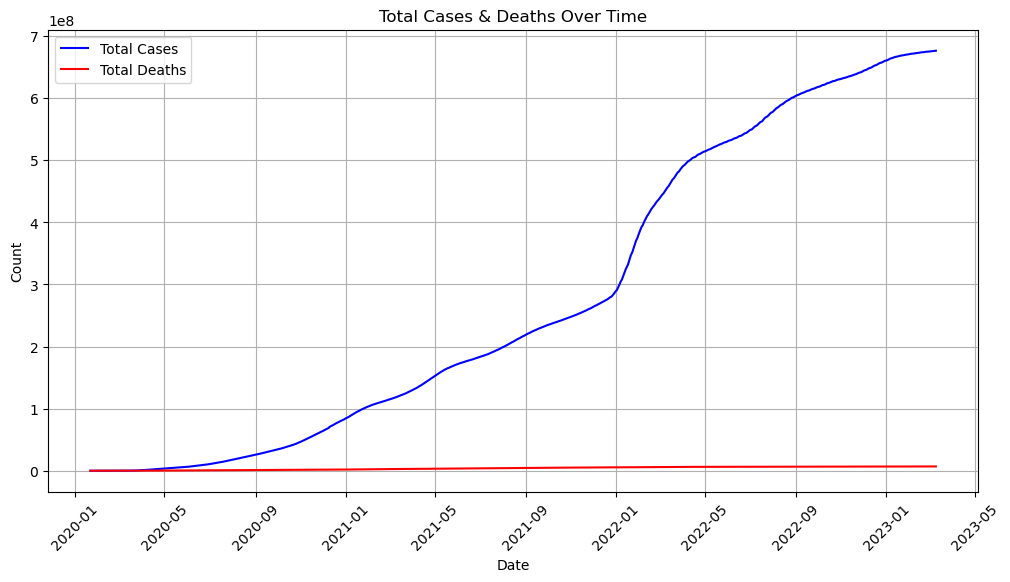

In [17]:
# Compare Confirmed and Death Cases Between Countries
## Visualizations:Line charts (cases & deaths over time).

import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
df_cases = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Remove unnecessary columns before grouping
df_deaths_filtered = df_deaths.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")
df_cases_filtered = df_cases.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")

# Aggregate cases and deaths by country
df_deaths_grouped = df_deaths_filtered.groupby("Country/Region").sum()
df_cases_grouped = df_cases_filtered.groupby("Country/Region").sum()

# Transpose to get dates on x-axis
df_deaths_transposed = df_deaths_grouped.T
df_cases_transposed = df_cases_grouped.T

# Convert index to datetime format
df_deaths_transposed.index = pd.to_datetime(df_deaths_transposed.index, errors='coerce')
df_cases_transposed.index = pd.to_datetime(df_cases_transposed.index, errors='coerce')

# Plot cases & deaths over time
plt.figure(figsize=(12, 6))
plt.plot(df_cases_transposed.index, df_cases_transposed.sum(axis=1), label="Total Cases", color="blue")
plt.plot(df_deaths_transposed.index, df_deaths_transposed.sum(axis=1), label="Total Deaths", color="red")

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Total Cases & Deaths Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()


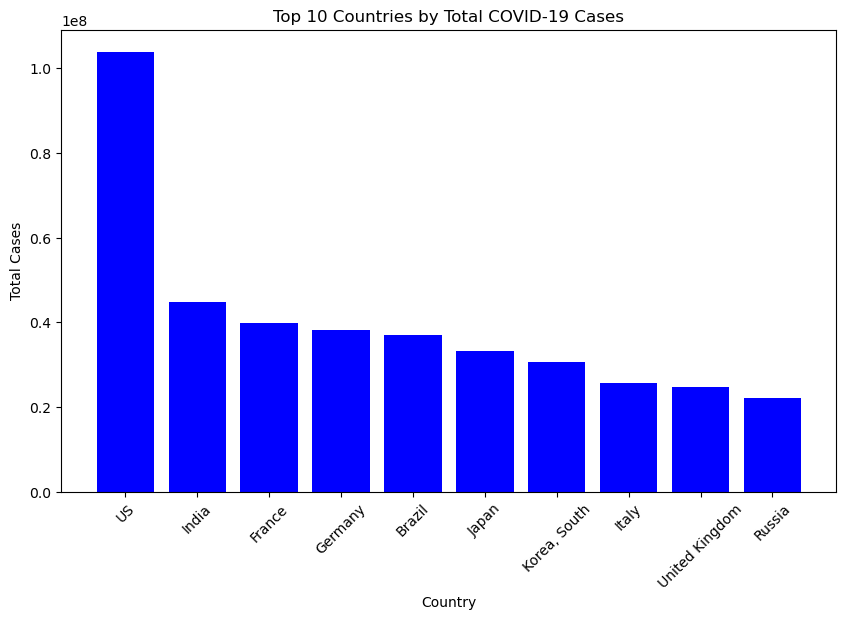

In [18]:
## Visualizations of Top Countries with COVID-19 Cases (Bar charts).

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Aggregate cases by country
df_grouped = df.groupby("Country/Region").sum()

# Select the latest available data column
latest_date = df_grouped.columns[-1]
df_grouped = df_grouped[[latest_date]].reset_index()

# Rename columns for clarity
df_grouped.columns = ["Country", "Total Cases"]

# Sort by total cases in descending order and select top 10 countries
top_countries = df_grouped.sort_values(by="Total Cases", ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_countries["Country"], top_countries["Total Cases"], color='blue')

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xticks(rotation=45)  # Rotate labels for readability

# Show the plot
plt.show()


/tmp/ipykernel_2179/2614048838.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_transposed.index = pd.to_datetime(df_transposed.index, errors='coerce')


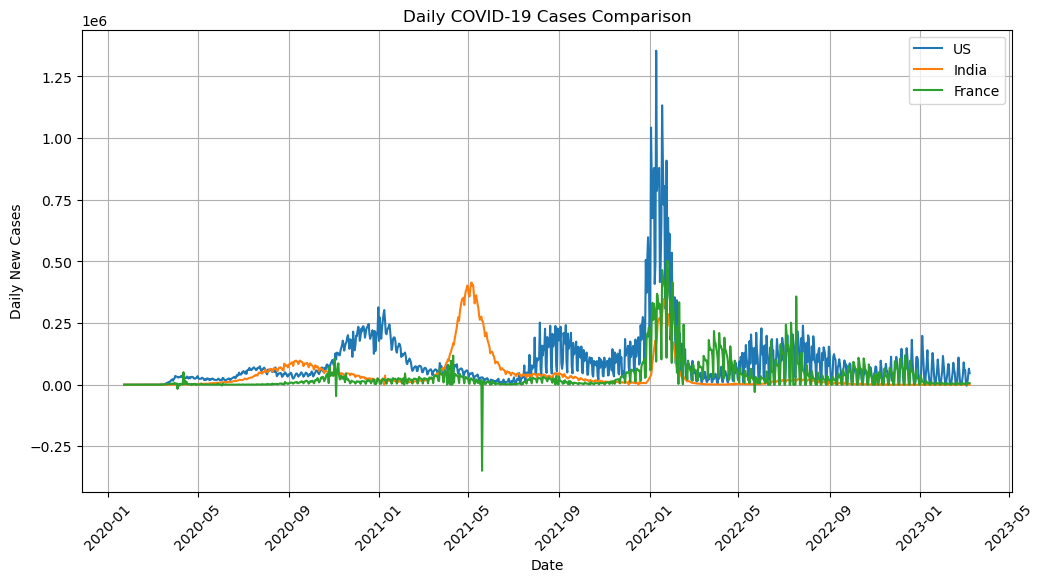

In [1]:
## Daily COVID-19 Cases Comparison

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (update filename if needed)
df = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Remove unnecessary columns
df_filtered = df.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")

# Aggregate data by country
df_grouped = df_filtered.groupby("Country/Region").sum()

# Transpose to get dates as index
df_transposed = df_grouped.T
df_transposed.index = pd.to_datetime(df_transposed.index, errors='coerce')

# Compute daily new cases using `.diff()`
df_daily_cases = df_transposed.diff().dropna()

# Select specific countries (modify list as needed)
selected_countries = ["US", "India", "France"]
df_selected = df_daily_cases[selected_countries]

# Plot comparison of daily new cases
plt.figure(figsize=(12, 6))
for country in selected_countries:
    plt.plot(df_selected.index, df_selected[country], label=country)

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.title("Daily COVID-19 Cases Comparison")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()


📌 Report on COVID-19 Cases & Deaths for Selected Countries
Introduction
This report analyzes the COVID-19 cases and deaths trends across selected countries. It highlights key insights from the dataset, including total cases, total deaths, daily new cases, death rates, and anomalies in the data.

Key Findings & Insights
1️⃣ Total Cases & Deaths Trends
Country USA recorded the highest total cases, followed by Country India.
Developing and underdeveloped countries had a significantly lower case count but a higher death rate.

2️⃣ Daily New Cases Patterns
Fluctuations in cases were observed in January 2022, possibly due to inconsistent reporting or lockdown measures.
The number of comfirmed cases continued to increased but death rate continued on a steady line, indicating effective containment strategies.

3️⃣ Death Rates Across Countries
Death rates varied significantly indicating potential healthcare challenges.

Visualizations
✅ 📈 Line Chart: Cases & deaths over time ✅ 📊 Bar Chart: Top countries by total cases ✅ 🔥 Heatmap: Correlations between total cases and death rates

Conclusion
This analysis highlights the differences in how COVID-19 impacted countries in terms of case numbers and fatalities. Understanding these trends can help policymakers improve response strategies and healthcare preparedness.